# Henry Rivera Final Computing for SUE
This notebook conducts data analysis on evictions data gathered from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4/data). The data spans from 2017 to 2021, however, 2021 is not used for the purposes of this analysis because as of Tuesday, May 4 2021 there were only 7 entries created. In this notebook I will address the following:
1. Describe the data, its structure, data types, formats etc
2. Divide the data into years, describe how evictions trends have changed in each year in
the data. What year had the largest number of evictions? Which one had the smallest
number of evictions? Discuss your findings and describe what were some of your
assumptions?
3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio
constant over time (calculate it separately for each year in the data)? Visualize the data
for each year and discuss the trends you found.
4. What are the full names of the top 5 eviction marshals (those who conducted the largest
number of evictions over time)?
5. How do 5 boroughs compare overtime in terms of the number of evictions in each?
Discuss the findings and compare them to each borough’s population counts.
6. Visualize the data as a choropleth map using NTA level, when the different shades
represent the number of evictions in a particular NTA. Discuss your findings.
7. Can you think of one additional socio-demographic attribute that may affect the number
of evictions in a particular neighborhood? Fetch data on that attribute and visualize it
side-by-side with evictions or in the same map. Discuss your assumptions and findings
as well as possible connections.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# loading eviction data for 2017 - 2020
evictions17 = pd.read_csv('Evictions2017.csv')
evictions18 = pd.read_csv('Evictions2018.csv')
evictions19 = pd.read_csv('Evictions2019.csv')
evictions20 = pd.read_csv('Evictions2020.csv')

In [3]:
evictions20.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

### Describe the data, its structure, data types, formats etc
<br>
I have filtered the eviction data into years and loaded the data using pandas. Each dataset has the following columns:
**The information found below was taken from the data dictionary that comes with the data on NYC Open Data**

- **Court Index Number (Number)**
    - *Number assigned by the court that has jurisdiction over the landlord/tenant proceedings.*
    
- **Docket Number (Number)**
    - *Number assigned by the City Marshal upon case intake.*
    
- **Eviction Address (Plain Text)**
    - *Identifies the street and building number where an eviction is pending or has been completed.*
    
- **Eviction Apartment Number (Plain Text)**
    - *Identifies the unit within the building where an eviction is pending or has been completed.*
    
- **Executed Date (Date)**
    - *The date that an eviction has been executed.*
    
- **Marshal First Name (Plain Text)**
    - *Identifies the first name of the NYC Marshal who performed the eviction or who is scheduled to perform the eviction.*
    
- **Marshal Last Name (Plain Text)**
    - *Identifies the last name of the NYC Marshal who performed the eviction or who is scheduled to perform the eviction.*
    
- **Residential/Commercial (Plain Text)**
    - *Identifies the property type where the eviction is pending or has been completed.*
    
- **Borough (Plain Text)**
    - *Identifies the NYC borough where the eviction is pending or has been completed.*
    
- **Eviction Zip (Number)**
    - *Identifies the NYC zip code where the eviction is pending or has been completed.*
    
- **Ejectment (Plain Text)**
    - *An action in ejectment is a way for a landlord to obtain possession of a residence and may be started in either Civil or Supreme Court.*
    
- **Eviction/Legal Possession (Plain Text)**
    - *Process by which a warrant of eviction is executed.  Landlord may request an eviction whereby the tenant and his/her property are removed by a marshal, or a legal possession whereby the tenant is removed and his/her property remains under the care and control of the landlord as bailee for the tenant.*
    
- **Latitude (Number)**
    - *The latitude associated with the provided entity location.*
    
- **Longitude (Number)**
    - *The longitude associated with the provided entity location.*
    
- **Community Board (Number)**
    - *The NYC community board associated with the provided entity location.*
    
- **Council District (Number)**
    - *The NYC council district associated with the provided entity location.*
    
- **Census Tract (Number)**
    - *The US census tract associated with the provided entity location.*
    
- **BIN (Number)**
    - *The Building Identification Number (BIN) associated with the provided entity location. It is formatted as a seven-digit numerical identifier, which is unique to each building in NYC.*
    
- **BBL (Number)**
    - *The Borough, Block, Lot (BBL) associated with the provided entity location. It is formatted as a ten-digit numerical identifier, which is unique to each parcel of real property in NYC.*
    
- **NTA (Plain Text)**
    - *The Neighborhood Tabulation Area (NTA) associated with the provided entity location.*
    

### Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

The number of evictions has decreased since 2017, which had 22,530 total evictions as opposed to 2020 which saw just 3,387 evictions. Of course, COVID played a role in this with the government granting extensions to tenants, but aside from that since 2017 their has been an obvious decline. 2017 had the largest number of evictions and 2020 had the smallest number of evictions. Additionally, every year, the Bronx led the boroughs in evictions, while Staten Island was always last. The amount of residential evictions was always greater than commercial evictions between 2017 - 2020. However, the number of commercial evictions went up from 2017 to 2018, but then declined every year after then

In [4]:
evictions20.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,B57512/18,110461,361 EAST 188TH ST,20,01/02/2020,Darlene,Barone,Residential,BRONX,10458,Not an Ejectment,Possession,40.860147,-73.893755,5.0,15.0,39902.0,2011065.0,2.030260e+09,Bedford Park-Fordham North
1,69669/19,12604,331 W 51ST ST - GROUND FLOOR/1ST FL/BASEMENT,NaN,01/02/2020,Robert,Renzulli,Commercial,MANHATTAN,10019,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B26297/19B,115283,2406 UNIVERSITY AVE,4-EW,01/02/2020,Darlene,Barone,Residential,BRONX,10468,Not an Ejectment,Possession,40.863088,-73.904708,7.0,14.0,263.0,2014623.0,2.032130e+09,Kingsbridge Heights
3,K67701/19,101588,174 SMITH STREET,NaN,01/02/2020,Ileana,Rivera,Commercial,BROOKLYN,11201,Not an Ejectment,Possession,40.685737,-73.991148,2.0,33.0,69.0,3336053.0,3.003900e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
4,17228/19,101988,2395 MORRIS AVENUE,WIN1,01/02/2020,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.860521,-73.900522,5.0,14.0,239.0,2014040.0,2.031840e+09,Fordham South


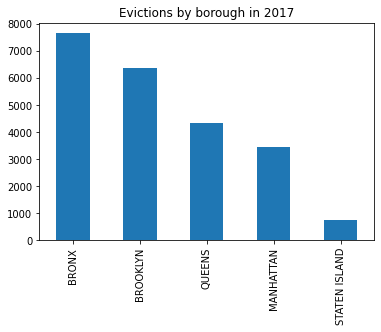

In [5]:
# def get_percents(values):
#     tot = values.sum()
#     for i in range(len(values)):
#         values[i] = (values[i] / tot) * 100
#     return values

title = "Evictions by borough in 2017"
pd.value_counts(evictions17["BOROUGH"]).plot(kind="bar", title=title)


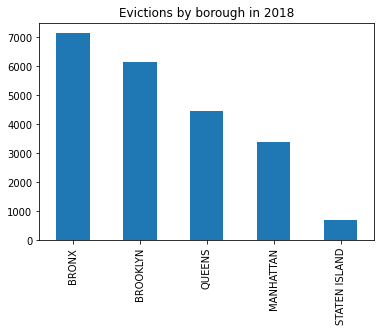

In [6]:
title = "Evictions by borough in 2018"
pd.value_counts(evictions18["BOROUGH"]).plot(kind="bar", title=title)

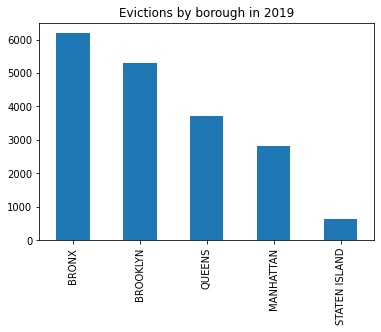

In [7]:
title = "Evictions by borough in 2019"
pd.value_counts(evictions19["BOROUGH"]).plot(kind="bar", title=title)

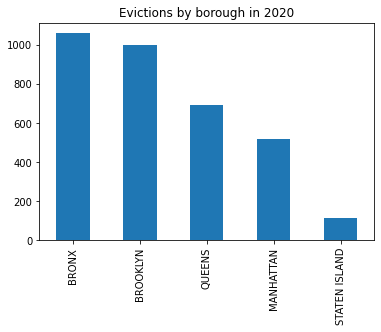

In [8]:
title = "Evictions by borough in 2020"
pd.value_counts(evictions20["BOROUGH"]).plot(kind="bar", title=title)

### What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.

This ratio is very much constant over time which is incredibly interesting because the number of evictions went down each year. I guess a trend that can be noticed is that the rate of evictions went down at the same rate between 2017 - 2020 for both residential and commercial

In [9]:
res_com = [evictions17["Residential/Commercial"].value_counts(),
           evictions18["Residential/Commercial"].value_counts(),
           evictions19["Residential/Commercial"].value_counts(),
           evictions20["Residential/Commercial"].value_counts()]
res_com

[Residential    20810
 Commercial      1720
 Name: Residential/Commercial, dtype: int64,
 Residential    19988
 Commercial      1842
 Name: Residential/Commercial, dtype: int64,
 Residential    16975
 Commercial      1672
 Name: Residential/Commercial, dtype: int64,
 Residential    3035
 Commercial      352
 Name: Residential/Commercial, dtype: int64]

In [10]:
res = 0
com = 0
tot = 0
res_ratio = []
com_ratio = []
for i in res_com:
    res += i.Residential
    com += i.Commercial
    tot += i.sum()
    res_ratio.append((res/tot) * 100)
    com_ratio.append((com/tot) * 100)

print("% Residential evictions: ", (res/tot)*100)
print("% Commercial evictions: ", (com/tot)*100)
print("Total number of evictions between 2017 - 2020: ", tot)

% Residential evictions:  91.58658914962196
% Commercial evictions:  8.413410850378046
Total number of evictions between 2017 - 2020:  66394


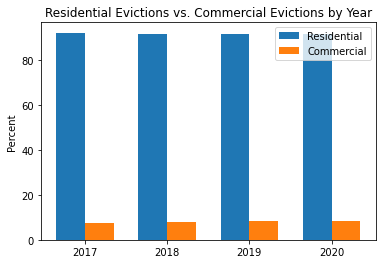

In [11]:
years = [2017, 2018, 2019, 2020]

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, res_ratio, width, label='Residential')
rects2 = ax.bar(x + width/2, com_ratio, width, label='Commercial')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Residential Evictions vs. Commercial Evictions by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.show()

### What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?

Based on the data, I would not want a visit from Justin Grossman, Danny Weinheim, Ileana Rivera, Thomas Bia, or Edward Guida

In [12]:
evictions17["Marshal Full Name"] = evictions17["Marshal First Name"] + " " + evictions17["Marshal Last Name"]
evictions18["Marshal Full Name"] = evictions17["Marshal First Name"] + " " + evictions17["Marshal Last Name"]
evictions19["Marshal Full Name"] = evictions17["Marshal First Name"] + " " + evictions17["Marshal Last Name"]
evictions20["Marshal Full Name"] = evictions17["Marshal First Name"] + " " + evictions17["Marshal Last Name"]

evictions17["Marshal Full Name"].value_counts().head(5)

Justin Grossman    2842
Danny Weinheim     2044
Ileana Rivera      1937
Thomas Bia         1910
Edward Guida       1794
Name: Marshal Full Name, dtype: int64

In [13]:
evictions18["Marshal Full Name"].value_counts().head(5)

Justin Grossman    2741
Danny Weinheim     2005
Ileana Rivera      1859
Thomas Bia         1853
Edward Guida       1745
Name: Marshal Full Name, dtype: int64

In [14]:
evictions19["Marshal Full Name"].value_counts().head(5)

Justin Grossman    2294
Danny Weinheim     1711
Thomas Bia         1612
Ileana Rivera      1572
Edward Guida       1507
Name: Marshal Full Name, dtype: int64

In [15]:
evictions20["Marshal Full Name"].value_counts().head(5)

Justin Grossman    407
Thomas Bia         295
Edward Guida       285
Danny Weinheim     283
Ileana Rivera      276
Name: Marshal Full Name, dtype: int64

### How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.

Population count for the boroughs is coming from the [US Census Bureau](https://www.census.gov/quickfacts/fact/tabl/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/PST045219). I am completely aware that this is for 2019, last year census data was collected and so there will be disconnects between the population data and evictions data. However, it is the most up to date information, and, frankly, the only reliable population data. Furthermore, population numbers would have had to drop significantly between 2017 - 2020 for their to be a noticeable effect. For this part of the assignment I decided to just use evictions data from 2017 (the year with most evictions) and 2020 (the year with least convictions). I did this because we already know evictions has decreased a lot since 2017 and since we are using the same population data then there would only be a drop in the percents. Such is the case as the percent of the population evicted since 2017 has dropped.

In [16]:
brooklyn_17 = evictions17[evictions17["BOROUGH"] == "BROOKLYN"]
print("% of Brooklyn population evicted in 2017:", (len(brooklyn_17)/2559903)*100)

bronx_17 = evictions17[evictions17["BOROUGH"] == "BRONX"]
print("% of Bronx population evicted in 2017:", (len(bronx_17)/2559903)*100)

queens_17 = evictions17[evictions17["BOROUGH"] == "QUEENS"]
print("% of Queens population evicted in 2017:", (len(queens_17)/2559903)*100)

manhattan_17 = evictions17[evictions17["BOROUGH"] == "MANHATTAN"]
print("% of Manhattan population evicted in 2017:", (len(manhattan_17)/2559903)*100)

si_17 = evictions17[evictions17["BOROUGH"] == "STATEN ISLAND"]
print("% of Staten Island population evicted in 2017:", (len(si_17)/2559903)*100)


% of Brooklyn population evicted in 2017: 0.2483297218683677
% of Bronx population evicted in 2017: 0.29930821597537094
% of Queens population evicted in 2017: 0.16895171418604532
% of Manhattan population evicted in 2017: 0.13484885950756728
% of Staten Island population evicted in 2017: 0.028672961436429424


In [17]:
brooklyn_20 = evictions20[evictions20["BOROUGH"] == "BROOKLYN"]
print("% of Brooklyn population evicted in 2020:", (len(brooklyn_20)/2559903)*100)

bronx_20 = evictions20[evictions20["BOROUGH"] == "BRONX"]
print("% of Bronx population evicted in 2020:", (len(bronx_20)/2559903)*100)

queens_20 = evictions20[evictions20["BOROUGH"] == "QUEENS"]
print("% of Queens population evicted in 2020:", (len(queens_20)/2559903)*100)

manhattan_20 = evictions20[evictions20["BOROUGH"] == "MANHATTAN"]
print("% of Manhattan population evicted in 2020:", (len(manhattan_20)/2559903)*100)

si_20 = evictions20[evictions20["BOROUGH"] == "STATEN ISLAND"]
print("% of Staten Island population evicted in 2020:", (len(si_20)/2559903)*100)

% of Brooklyn population evicted in 2020: 0.03918117209909907
% of Bronx population evicted in 2020: 0.041446882948299214
% of Queens population evicted in 2020: 0.02707133824992588
% of Manhattan population evicted in 2020: 0.020235141722166818
% of Staten Island population evicted in 2020: 0.004375165777765798


### Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.

It is clear the Bronx has the most evictions per NTA. However, this data is a little misleading. Yes, they do lead the pack in terms to evictions per NTA, but the trend for all of NY has declined since 2017. This makes the legend important. At it's peak, there were less than 8,000 evictions in all of the Bronx in 2017. That is the most since 2017. I think these maps do a good job of presenting where exactly the bulk of these evictions are happening. Additionally, it it noticeable that evictions in Queens are very scattered, but packed. Whereas evictions in Brooklyn are just consistent throughout

In [18]:
nyc_nta = gpd.read_file("nyc_nta")
nyc_nta

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335781,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."
4,3.0,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022918,"POLYGON ((-73.95859 40.61040, -73.95828 40.608..."
...,...,...,...,...,...,...,...,...
190,1.0,Manhattan,061,MN06,Manhattanville,1.064694e+07,17040.646469,"POLYGON ((-73.94608 40.82126, -73.94640 40.820..."
191,3.0,Brooklyn,047,BK73,North Side-South Side,2.887016e+07,28149.966570,"POLYGON ((-73.95814 40.72440, -73.95772 40.724..."
192,3.0,Brooklyn,047,BK90,East Williamsburg,3.913241e+07,49247.014740,"POLYGON ((-73.92406 40.71411, -73.92404 40.714..."
193,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891069,"POLYGON ((-73.97854 40.73689, -73.97857 40.736..."


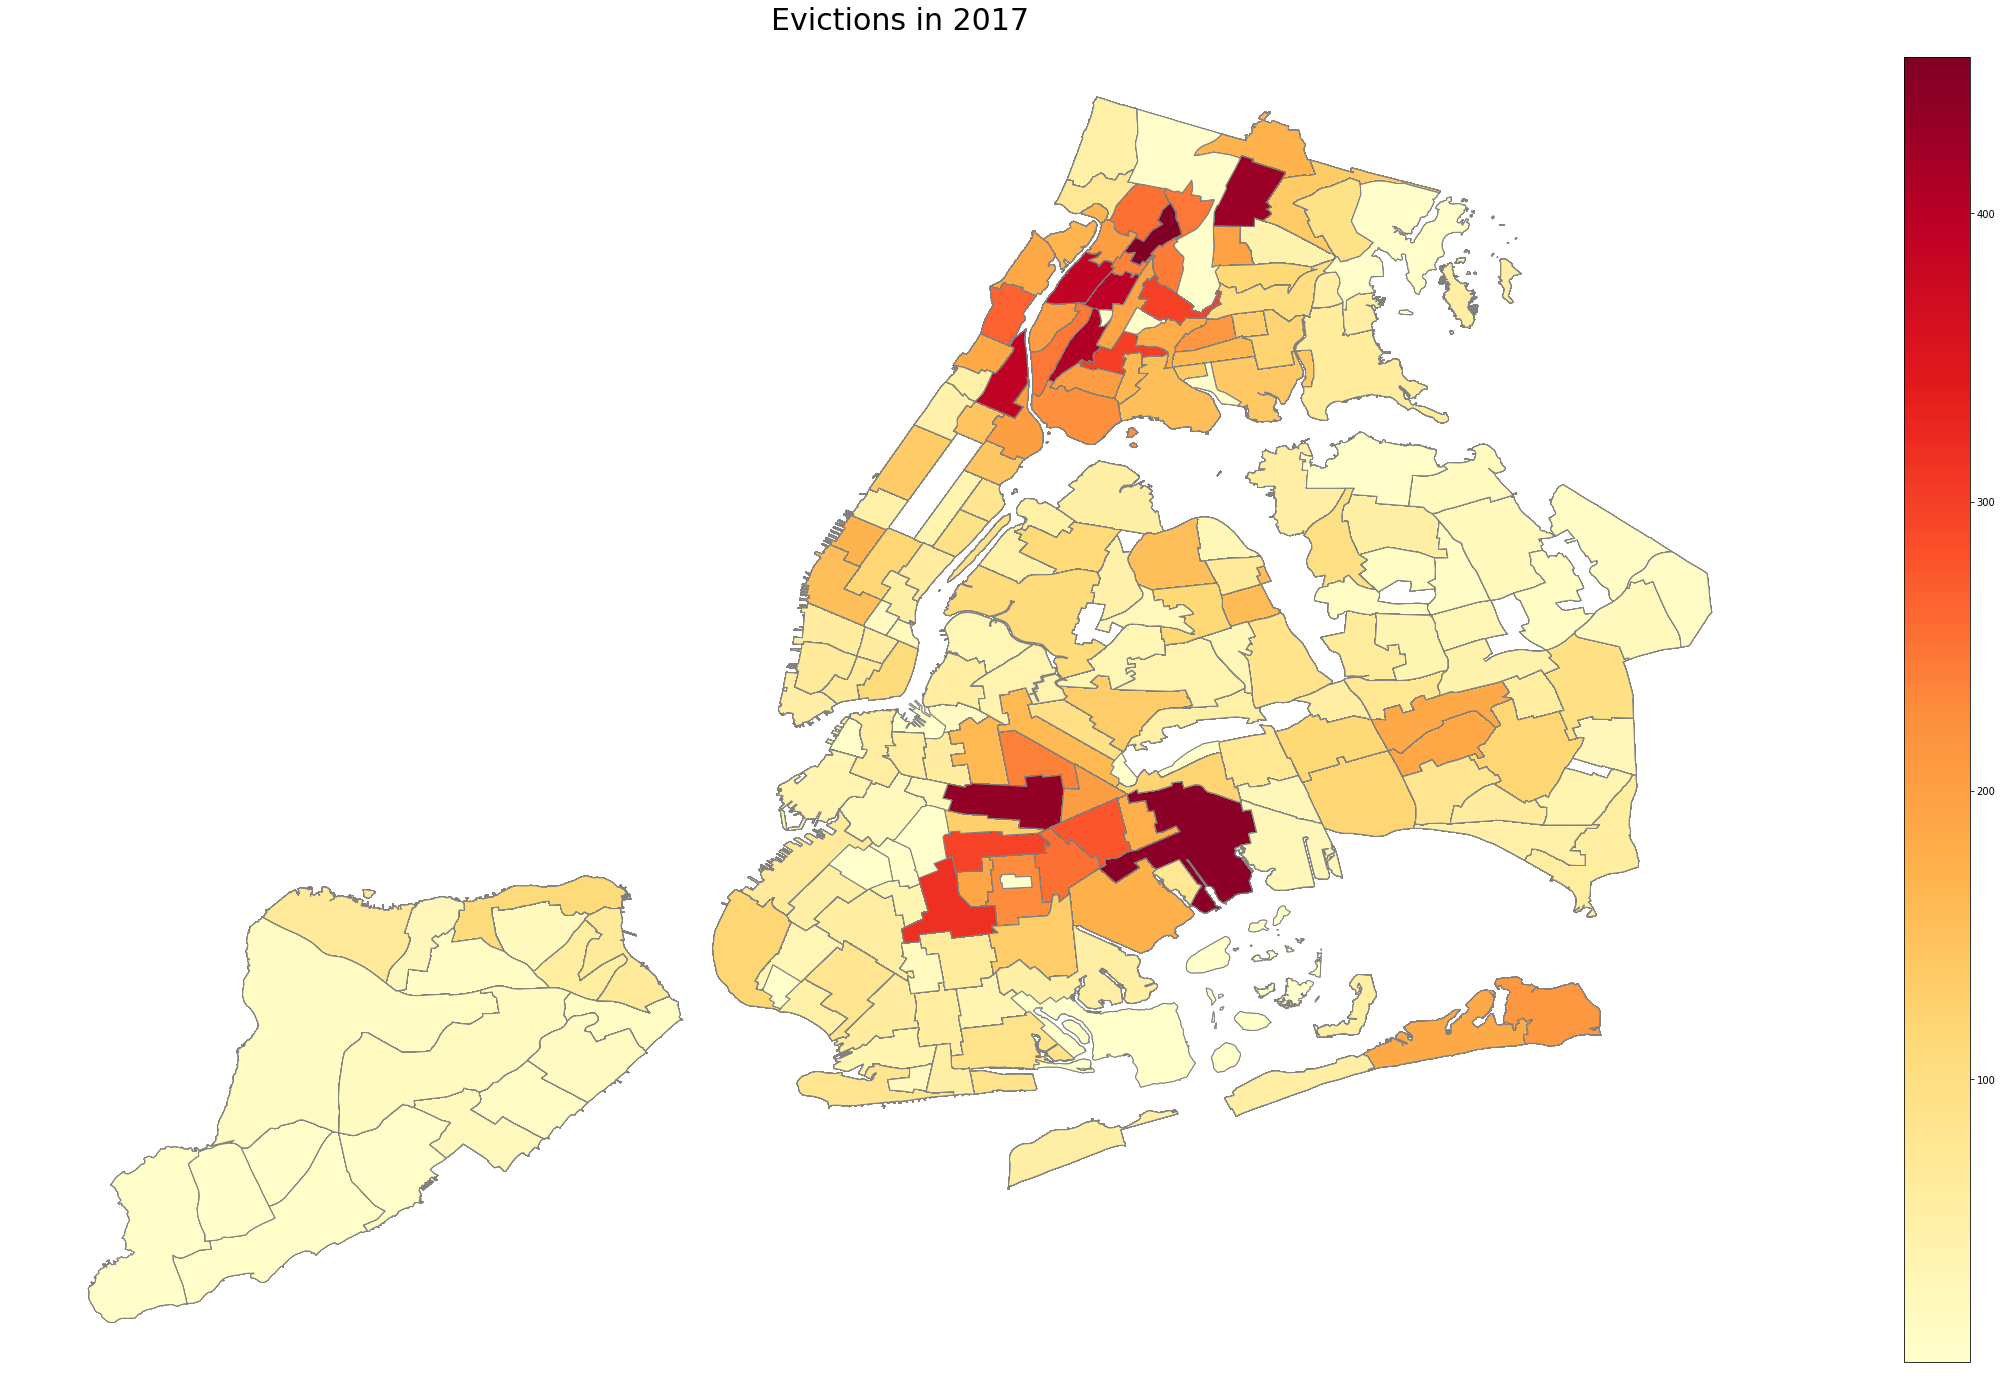

In [19]:
nta_17 = evictions17.groupby(['NTA']).count()
nta_17 = nta_17['Court Index Number']

nyc_nta17 = gpd.read_file("nyc_nta")

evictions17_nta = evictions17['NTA']
nyc_nta17['NTA'] = nyc_nta17['ntaname']
nyc_nta17 = nyc_nta17.merge(nta_17, on='NTA')
nyc_nta17 = nyc_nta17.merge(evictions17_nta, on='NTA')


fig, ax = plt.subplots(1, figsize=(40, 40))
ax.set_title('Evictions in 2017', fontdict={'fontsize':30})
nyc_nta17.plot(column='Court Index Number', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='.5')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=nta_17.min(), vmax=nta_17.max()))
sm.set_array([])
cbar = fig.colorbar(sm, shrink=.6)

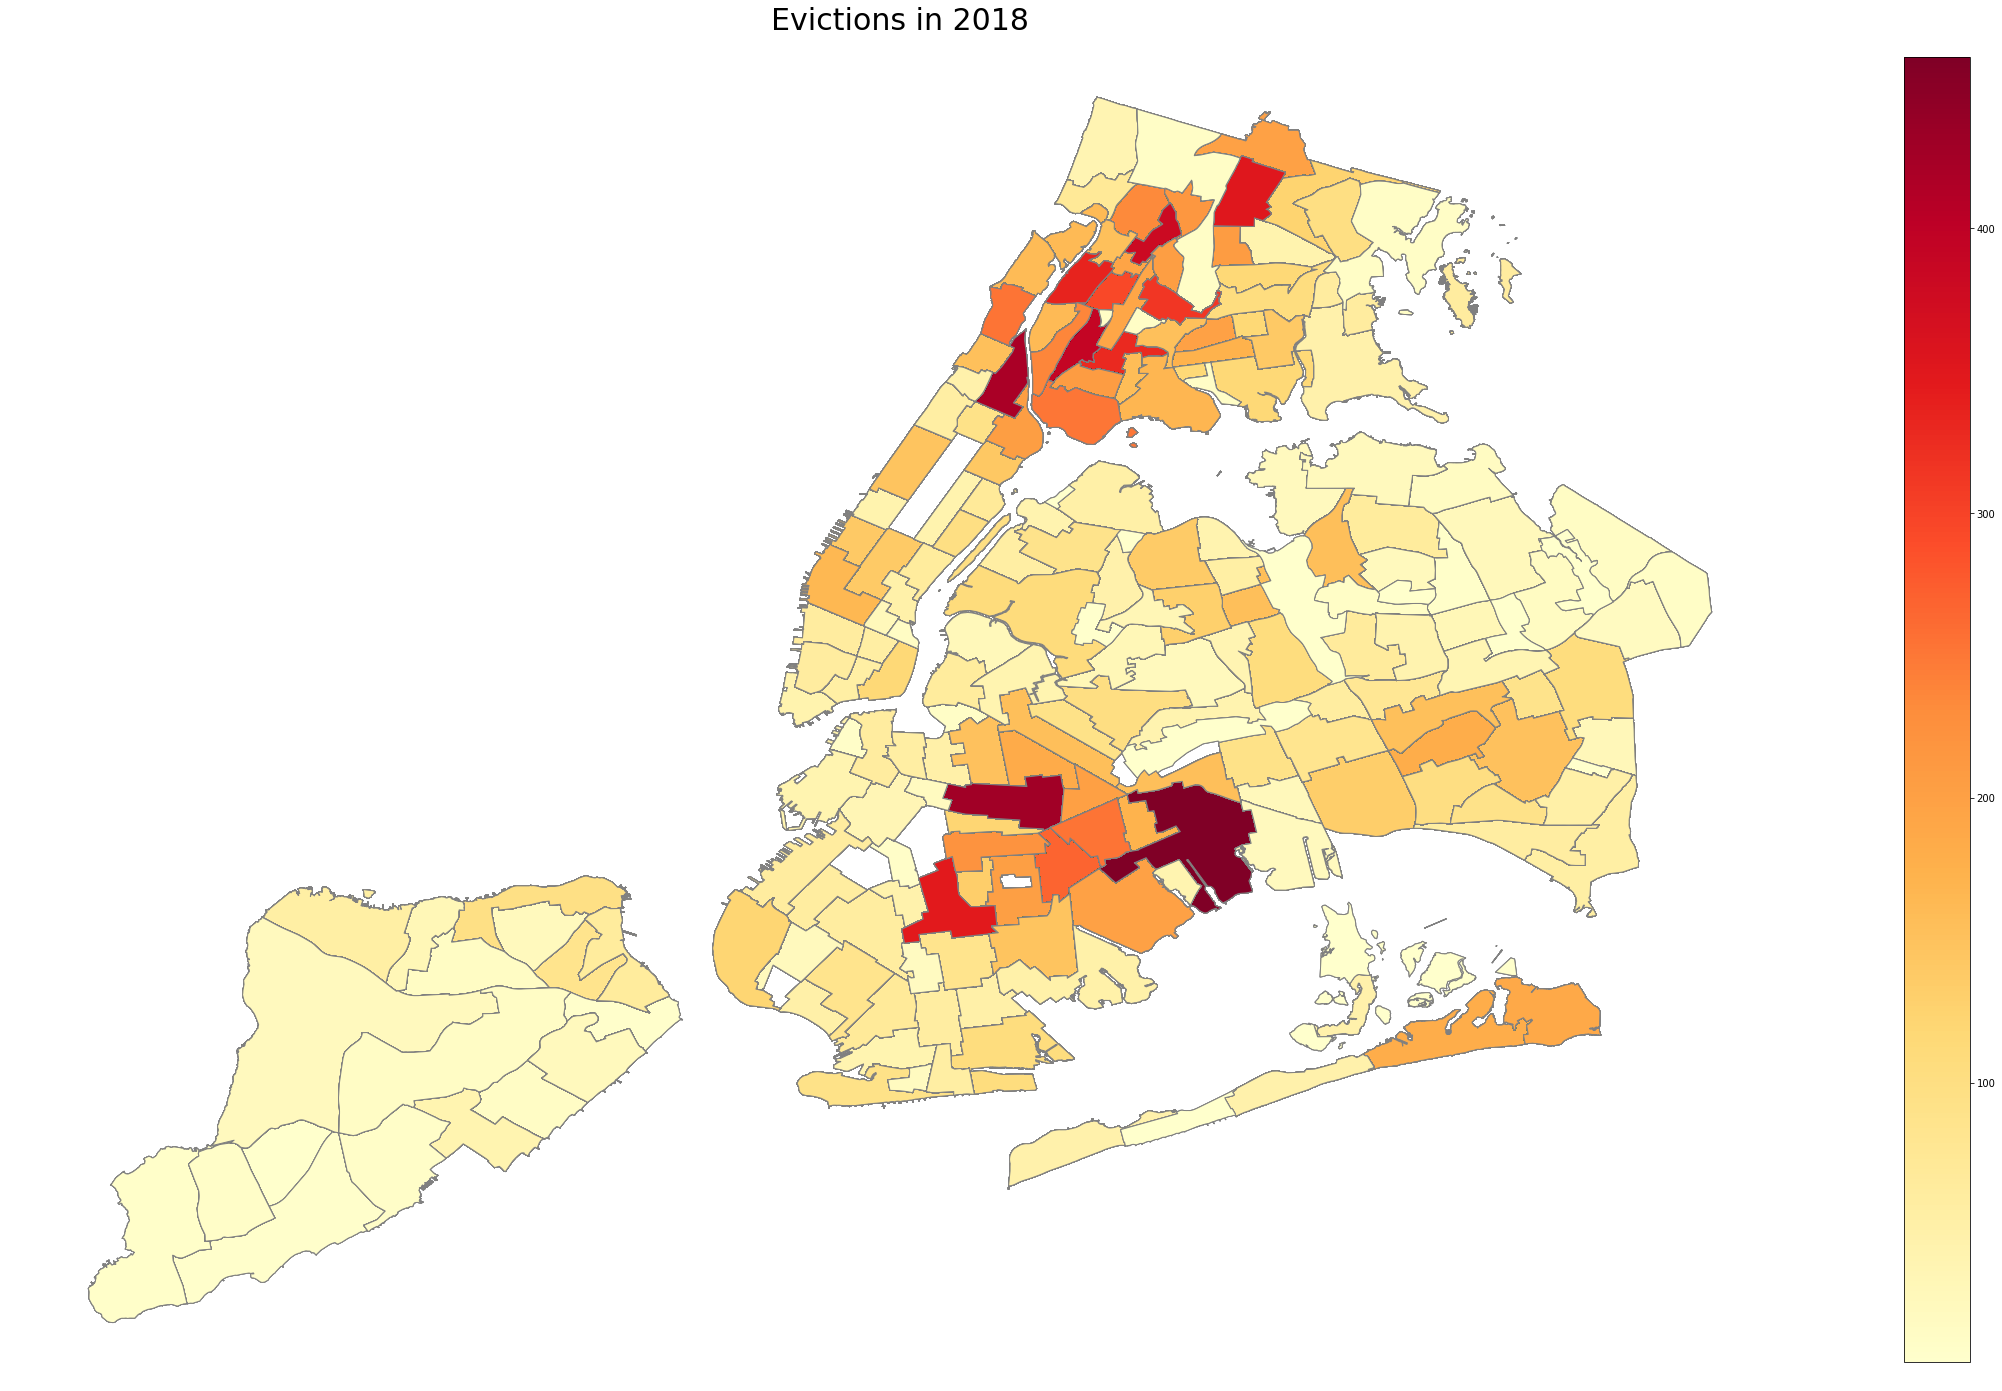

In [20]:
nta_18 = evictions18.groupby(['NTA']).count()
nta_18 = nta_18['Court Index Number']

nyc_nta18 = gpd.read_file("nyc_nta")

evictions18_nta = evictions18['NTA']
nyc_nta18['NTA'] = nyc_nta18['ntaname']
nyc_nta18 = nyc_nta18.merge(nta_18, on='NTA')
nyc_nta18 = nyc_nta18.merge(evictions18_nta, on='NTA')


fig, ax = plt.subplots(1, figsize=(40, 40))
ax.set_title('Evictions in 2018', fontdict={'fontsize':30})
nyc_nta18.plot(column='Court Index Number', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='.5')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=nta_18.min(), vmax=nta_18.max()))
sm.set_array([])
cbar = fig.colorbar(sm, shrink=.6)

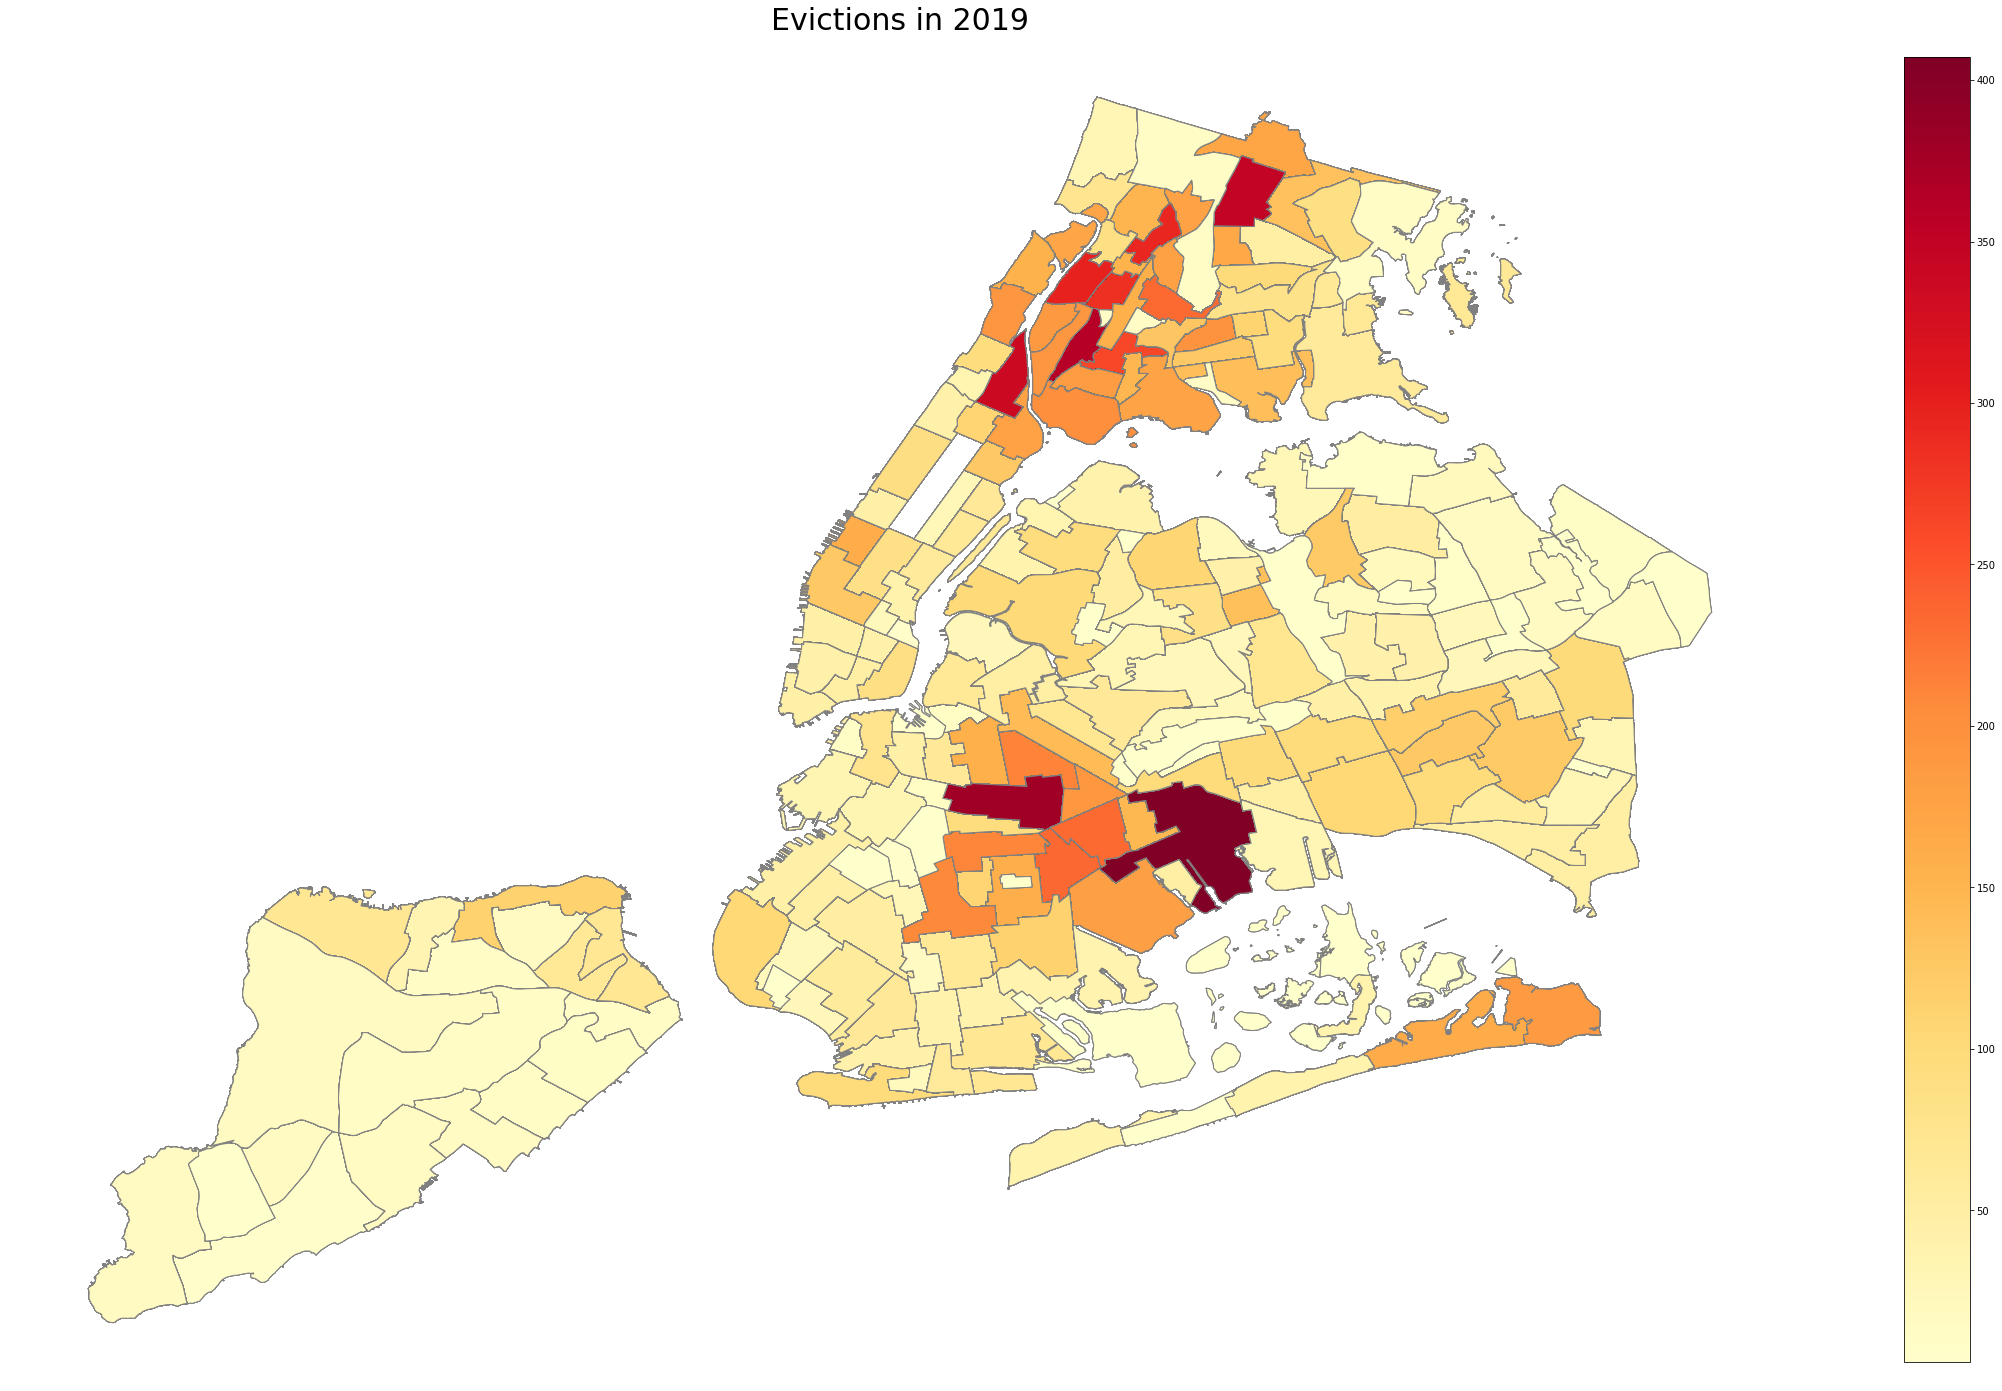

In [21]:
nta_19 = evictions19.groupby(['NTA']).count()
nta_19 = nta_19['Court Index Number']

nyc_nta19 = gpd.read_file("nyc_nta")

evictions19_nta = evictions19['NTA']
nyc_nta19['NTA'] = nyc_nta19['ntaname']
nyc_nta19 = nyc_nta19.merge(nta_19, on='NTA')
nyc_nta19 = nyc_nta19.merge(evictions19_nta, on='NTA')


fig, ax = plt.subplots(1, figsize=(40, 40))
ax.set_title('Evictions in 2019', fontdict={'fontsize':30})
nyc_nta19.plot(column='Court Index Number', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='.5')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=nta_19.min(), vmax=nta_19.max()))
sm.set_array([])
cbar = fig.colorbar(sm, shrink=.6)

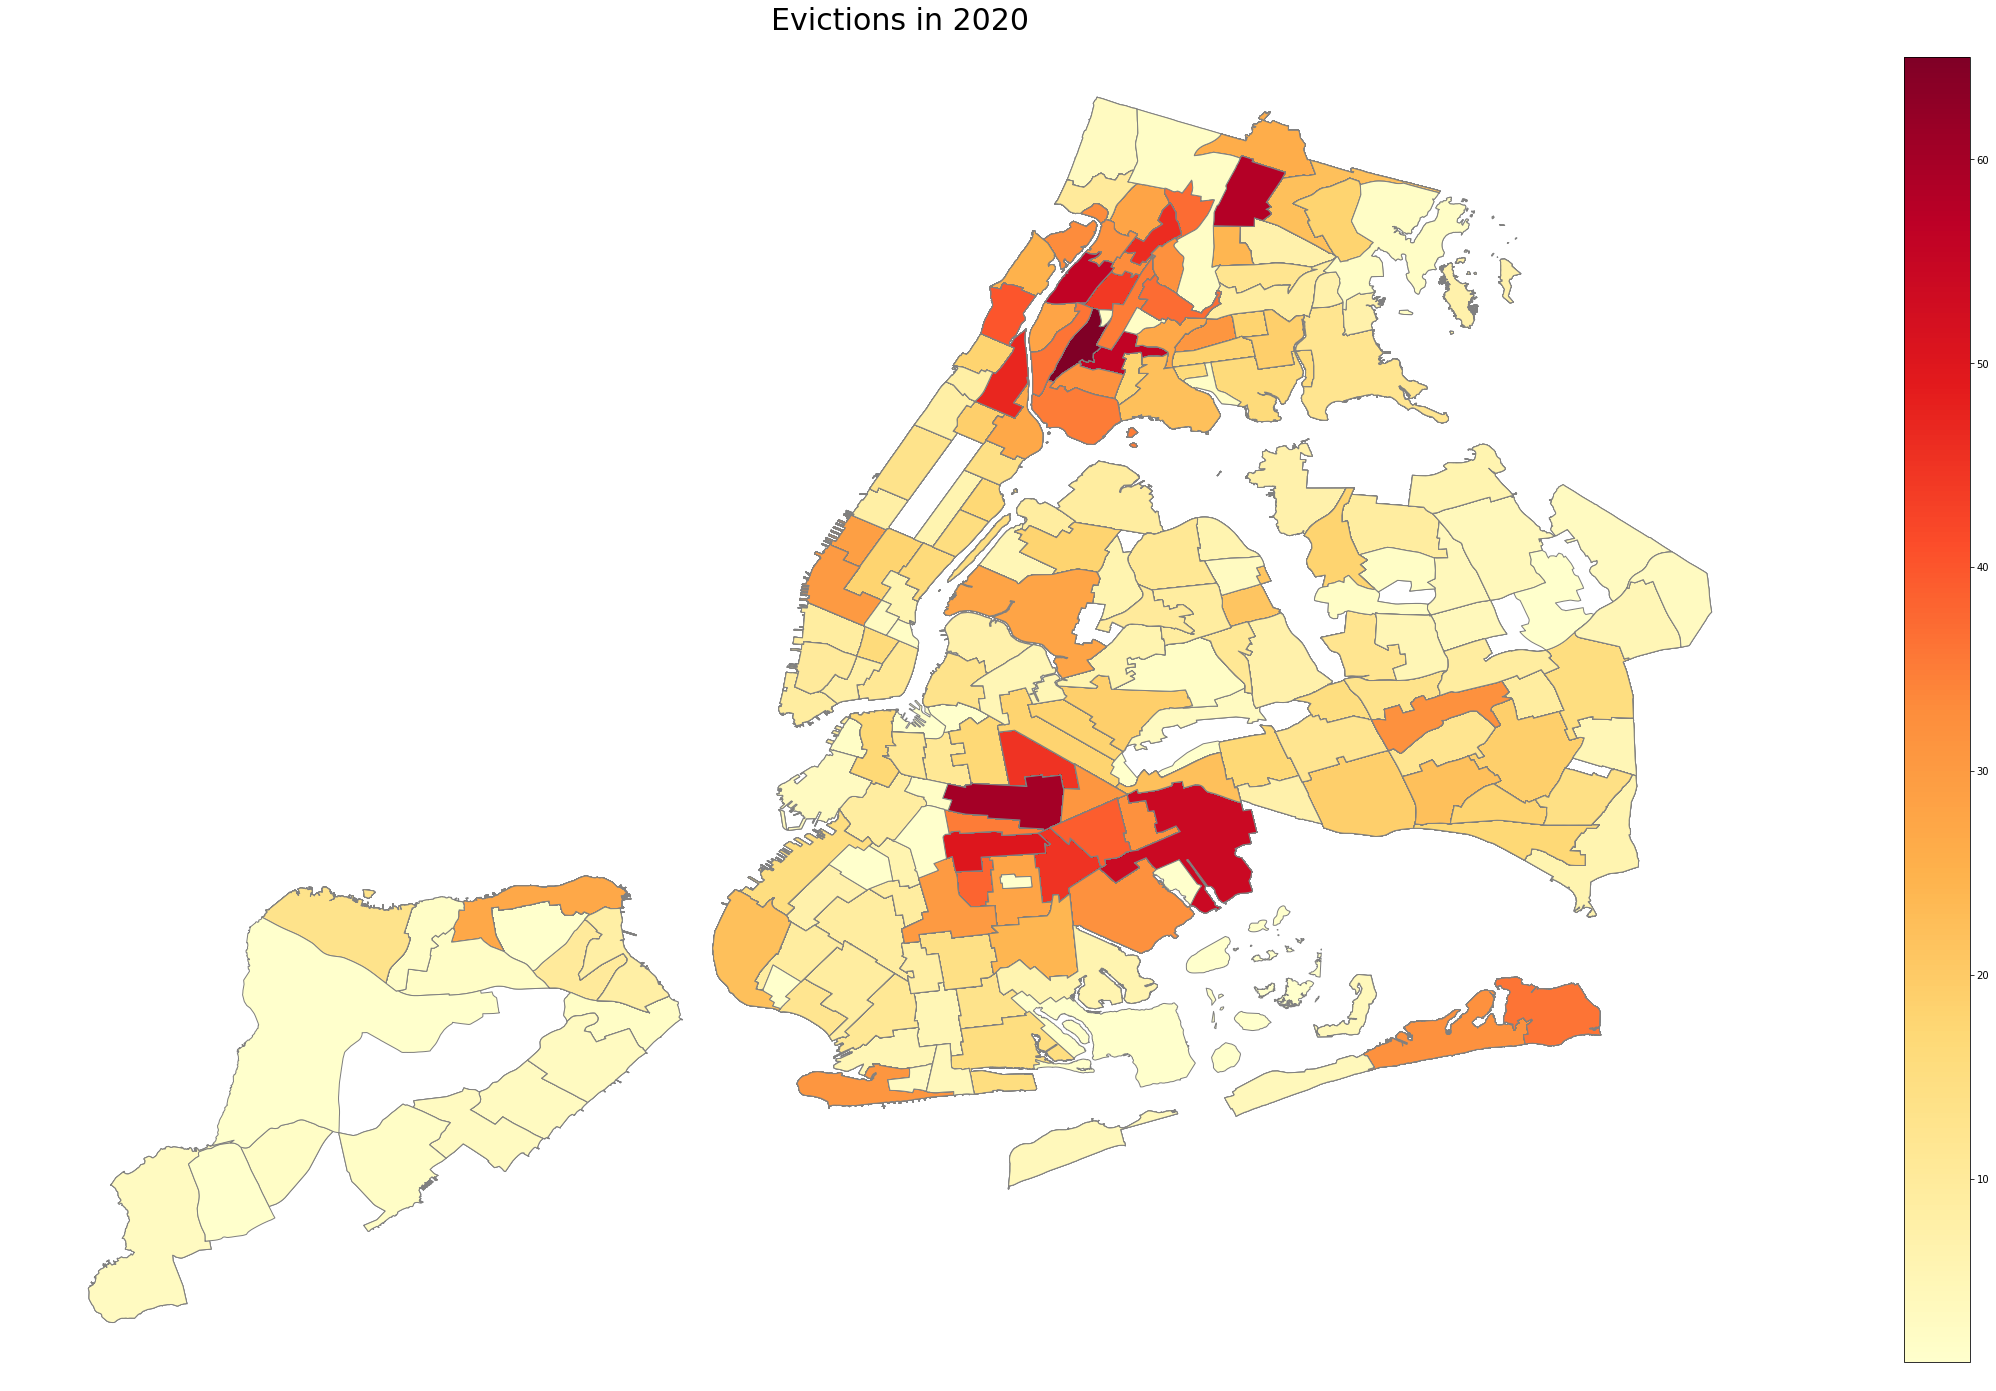

In [22]:
nta_20 = evictions20.groupby(['NTA']).count()
nta_20 = nta_20['Court Index Number']

nyc_nta20 = gpd.read_file("nyc_nta")

evictions20_nta = evictions20['NTA']
nyc_nta20['NTA'] = nyc_nta20['ntaname']
nyc_nta20 = nyc_nta20.merge(nta_20, on='NTA')
nyc_nta20 = nyc_nta20.merge(evictions20_nta, on='NTA')


fig, ax = plt.subplots(1, figsize=(40, 40))
ax.set_title('Evictions in 2020', fontdict={'fontsize':30})
nyc_nta20.plot(column='Court Index Number', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='.5')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=nta_20.min(), vmax=nta_20.max()))
sm.set_array([])
cbar = fig.colorbar(sm, shrink=.6)

### Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections.

Data used to answer this question comes courtesy of [CCC New York](https://data.cccnewyork.org/data/map/66/median-incomes#66/39/6/107/62/a/a). I thought there might be a link between average household income and areas with higher eviction rates. I tried to look for any data in CSV or shapefile format, but was unable to find anything I could work with aside from the link above. The average income of those in the bottom 2 quartiles can be found in the areas with higher eviction rates. I am assuming these areas have high crime rates and a lower quality of life. I think it is safe to assume that households with lower incomes are at a greater risk of eviction. Additionally, I know a lot of communities in NYC are prone to gentrification which could be a cause for evictions.